<a href="https://colab.research.google.com/github/TomasLopezTur/TP_Integrador-E-Learning_DataScience/blob/main/Trabajo_integrador_Tomas_Lopez_Turconi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabajo integrador - Tomas Lopez Turconi

La elección de este tipo de dataset se debe a varios motivos. En primer lugar, me interesaba explorar cómo se aplican las técnicas de Data Science en el ámbito financiero, ya que es un área que siempre me ha llamado la atención. A través del análisis de los tipos de cambio, puedo poner en práctica lo aprendido en el curso y, al mismo tiempo, adquirir un mejor entendimiento de cómo funcionan los mercados financieros.

Además, inicialmente consideré trabajar con datos relacionados con el turismo, pero durante mi búsqueda me encontré con que los datasets disponibles no cumplían con mis expectativas: algunos tenían datos incompletos, otros carecían de variables significativas, y en general, no me resultaban lo suficientemente robustos para realizar un análisis profundo. Esto me llevó a cambiar de enfoque y optar por los datos financieros, que no solo son más consistentes y completos, sino que también ofrecen un amplio abanico de posibilidades para el análisis y la aplicación de modelos predictivos.

En resumen, elegí estos datasets porque me permiten combinar mi interés por la economía con las herramientas de Data Science, abordando problemáticas reales y relevantes en el ámbito financiero. A través de este proyecto, espero no solo cumplir con los objetivos del curso, sino también ampliar mis conocimientos en un área que considero fundamental para entender el mundo actual.

In [ ]:
import yfinance as yf
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Símbolos de los pares de divisas
simbol_usd_jpy = 'USDJPY=X'
simbol_usd_eur = 'USDEUR=X'
simbol_usd_ars = 'USDARS=X'

cambioUSDJPY = yf.Ticker(simbol_usd_jpy)
cambioUSDEUR = yf.Ticker(simbol_usd_eur)
cambioUSDARS = yf.Ticker(simbol_usd_ars)

data_usd_jpy = cambioUSDJPY.history(period="max")
data_usd_eur = cambioUSDEUR.history(period="max")
data_usd_ars = cambioUSDARS.history(period="max")


# Mostrar los datos
print("Datos históricos de USD/JPY:")
#print(data_usd_jpy.to_string())
print(data_usd_jpy)
print("Datos históricos de USD/EUR:")
print(data_usd_eur)
#print(data_usd_eur.to_string())
print("Datos históricos de USD/ARS:")
print(data_usd_ars)
#print(data_usd_ars.to_string())

Datos históricos de USD/JPY:
                                 Open        High         Low       Close  \
Date                                                                        
1996-10-30 00:00:00+00:00  114.370003  114.480003  113.610001  114.180000   
1996-11-01 00:00:00+00:00  113.500000  113.500000  113.500000  113.500000   
1996-11-04 00:00:00+00:00  113.279999  113.980003  112.949997  113.879997   
1996-11-05 00:00:00+00:00  113.709999  114.330002  113.449997  114.250000   
1996-11-06 00:00:00+00:00  114.230003  114.680000  113.650002  113.949997   
...                               ...         ...         ...         ...   
2025-03-11 00:00:00+00:00  147.069000  148.113998  146.546997  147.069000   
2025-03-12 00:00:00+00:00  148.042007  149.186005  147.848007  148.042007   
2025-03-13 00:00:00+00:00  148.279007  148.360001  147.587997  148.279007   
2025-03-14 00:00:00+00:00  147.949005  148.996002  147.850006  147.949005   
2025-03-15 00:00:00+00:00  148.610001  148.6100

# Limpieza y estandarizacion de datos
Se identificarán y eliminarán los registros que contengan valores nulos (null), ceros (0) o cualquier otro dato que no sea útil para el análisis.

La columna de fecha (Date) se ajustará para que solo contenga la fecha, eliminando la hora si está presente. Esto es importante para estandarizar el formato y facilitar el análisis temporal.

Ya que los datos de Europa comienzan a partir del 1 de diciembre de 2003, se recortará el dataset para que todos los datos (USD/JPY, USD/EUR y USD/ARS) cubran el mismo período temporal, desde 2003-12-01 hasta la actualidad. Esto asegura que los análisis y comparaciones entre divisas sean consistentes y válidos.


In [ ]:
print("Datos históricos de USD/JPY:")
data_usd_jpy.info()
print("Datos históricos de USD/EUR:")
data_usd_eur.info()
print("Datos históricos de USD/ARS:")
data_usd_ars.info()

Datos históricos de USD/JPY:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7360 entries, 1996-10-30 00:00:00+00:00 to 2025-03-15 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7360 non-null   float64
 1   High          7360 non-null   float64
 2   Low           7360 non-null   float64
 3   Close         7360 non-null   float64
 4   Volume        7360 non-null   int64  
 5   Dividends     7360 non-null   float64
 6   Stock Splits  7360 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 460.0 KB
Datos históricos de USD/EUR:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5525 entries, 2003-12-01 00:00:00+00:00 to 2025-03-14 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5525 non-null   float64
 1   High          5525 non-null   float64
 2   Low           5525

In [ ]:
# 1. Eliminar columnas no útiles (Volume, Dividends y Stock Splits)
columns_useful = ['Open', 'High', 'Low', 'Close']
data_usd_jpy = data_usd_jpy[columns_useful]
data_usd_eur = data_usd_eur[columns_useful]
data_usd_ars = data_usd_ars[columns_useful]

print("Datos históricos de USD/JPY:")
print(data_usd_jpy)
print("Datos históricos de USD/EUR:")
print(data_usd_eur)
print("Datos históricos de USD/ARS:")
print(data_usd_ars)

Datos históricos de USD/JPY:
                                 Open        High         Low       Close
Date                                                                     
1996-10-30 00:00:00+00:00  114.370003  114.480003  113.610001  114.180000
1996-11-01 00:00:00+00:00  113.500000  113.500000  113.500000  113.500000
1996-11-04 00:00:00+00:00  113.279999  113.980003  112.949997  113.879997
1996-11-05 00:00:00+00:00  113.709999  114.330002  113.449997  114.250000
1996-11-06 00:00:00+00:00  114.230003  114.680000  113.650002  113.949997
...                               ...         ...         ...         ...
2025-03-11 00:00:00+00:00  147.069000  148.113998  146.546997  147.069000
2025-03-12 00:00:00+00:00  148.042007  149.186005  147.848007  148.042007
2025-03-13 00:00:00+00:00  148.279007  148.360001  147.587997  148.279007
2025-03-14 00:00:00+00:00  147.949005  148.996002  147.850006  147.949005
2025-03-15 00:00:00+00:00  148.610001  148.610001  148.610001  148.610001

[7360 ro

In [ ]:
# Convertir el índice en una columna
data_usd_jpy = data_usd_jpy.reset_index()
data_usd_eur = data_usd_eur.reset_index()
data_usd_ars = data_usd_ars.reset_index()

# Convertir la columna 'Date' a tipo datetime
data_usd_jpy['Date'] = pd.to_datetime(data_usd_jpy['Date'])
data_usd_eur['Date'] = pd.to_datetime(data_usd_eur['Date'])
data_usd_ars['Date'] = pd.to_datetime(data_usd_ars['Date'])

# Eliminar la información de la zona horaria
data_usd_jpy['Date'] = data_usd_jpy['Date'].dt.tz_localize(None)
data_usd_eur['Date'] = data_usd_eur['Date'].dt.tz_localize(None)
data_usd_ars['Date'] = data_usd_ars['Date'].dt.tz_localize(None)

# Recortar el dataset desde 2003-12-01 hasta la actualidad
data_usd_jpy = data_usd_jpy[data_usd_jpy['Date'] >= '2003-12-01']
data_usd_eur = data_usd_eur[data_usd_eur['Date'] >= '2003-12-01']
data_usd_ars = data_usd_ars[data_usd_ars['Date'] >= '2003-12-01']

print("Datos históricos de USD/JPY:")
print(data_usd_jpy)
data_usd_jpy.info()
print("Datos históricos de USD/EUR:")
print(data_usd_eur)
data_usd_eur.info()
print("Datos históricos de USD/ARS:")
print(data_usd_ars)
data_usd_ars.info()

Datos históricos de USD/JPY:
           Date        Open        High         Low       Close
1834 2003-12-01  109.830002  109.989998  109.050003  109.169998
1835 2003-12-02  109.180000  109.779999  108.480003  108.730003
1836 2003-12-03  108.730003  108.790001  108.040001  108.300003
1837 2003-12-04  108.300003  108.459999  107.900002  108.269997
1838 2003-12-05  108.250000  108.419998  107.489998  107.620003
...         ...         ...         ...         ...         ...
7355 2025-03-11  147.069000  148.113998  146.546997  147.069000
7356 2025-03-12  148.042007  149.186005  147.848007  148.042007
7357 2025-03-13  148.279007  148.360001  147.587997  148.279007
7358 2025-03-14  147.949005  148.996002  147.850006  147.949005
7359 2025-03-15  148.610001  148.610001  148.610001  148.610001

[5526 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 5526 entries, 1834 to 7359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -

# Analisis y visualizacion

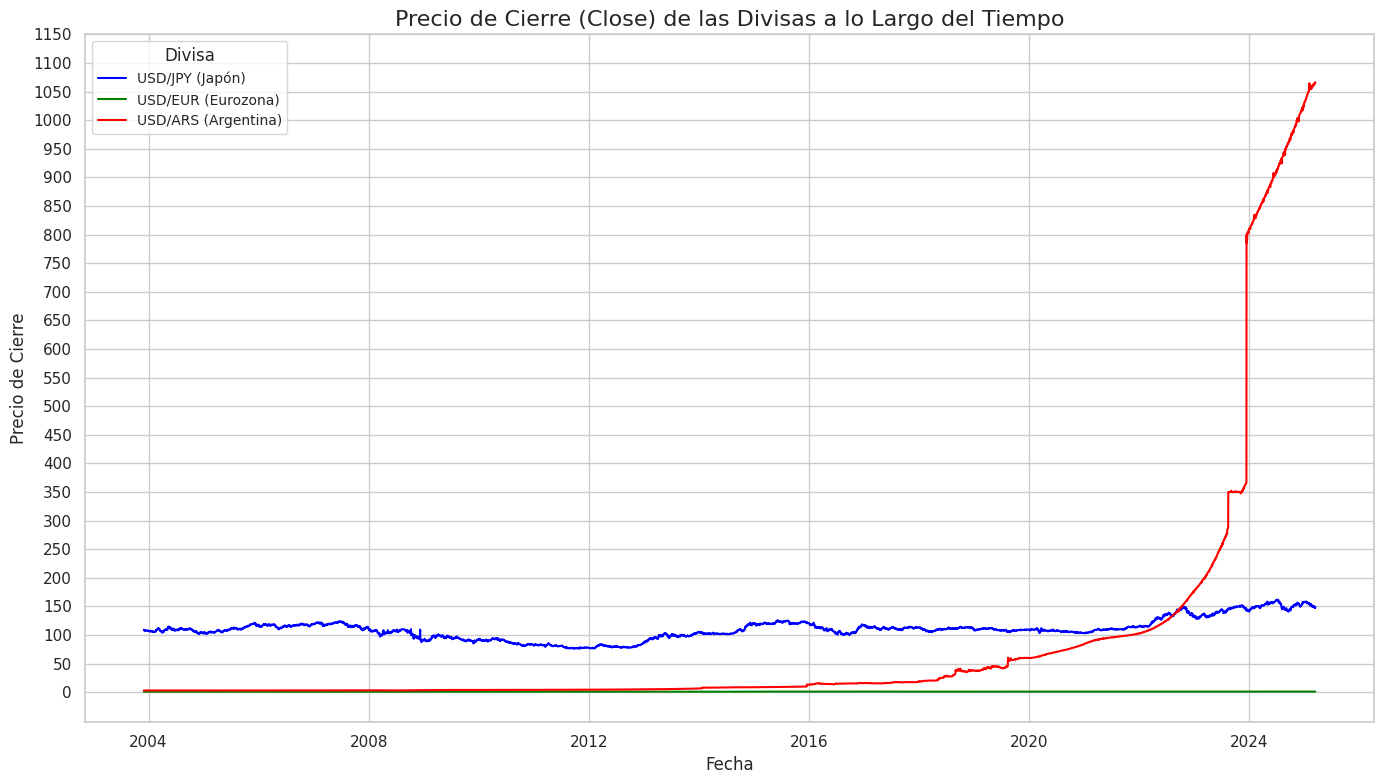

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar USD/JPY
plt.plot(data_usd_jpy['Date'], data_usd_jpy['Close'], label='USD/JPY (Japón)', color='blue')

# Graficar USD/EUR
plt.plot(data_usd_eur['Date'], data_usd_eur['Close'], label='USD/EUR (Eurozona)', color='green')

# Graficar USD/ARS
plt.plot(data_usd_ars['Date'], data_usd_ars['Close'], label='USD/ARS (Argentina)', color='red')

# Ajustar las divisiones del eje Y
plt.yticks(range(0, 1200, 50))  # De 0 a 1200, con incrementos de 50

# Añadir detalles al gráfico
plt.title('Precio de Cierre (Close) de las Divisas a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(title='Divisa', title_fontsize=12, fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**USD/JPY (Japón)**: La línea azul mostrará cómo ha fluctuado el tipo de cambio entre el dólar estadounidense y el yen japonés.

Podrás identificar períodos de fortaleza o debilidad del yen frente al dólar.

**USD/EUR (Eurozona)**: La línea verde mostrará la evolución del tipo de cambio entre el dólar estadounidense y el euro.

Podrás ver cómo ha variado el euro frente al dólar a lo largo del tiempo.

**USD/ARS (Argentina)**: La línea roja mostrará el tipo de cambio entre el dólar estadounidense y el peso argentino.

Dado que el peso argentino ha experimentado una fuerte devaluación, es probable que esta línea muestre una tendencia alcista pronunciada.

Métricas descriptivas para USD/JPY:
Media                  110.015238
Mediana                109.349998
Desviación Estándar     18.105946
Mínimo                  75.739998
Máximo                 161.621002
Q1 (25%)               101.467003
Q3 (75%)               117.410004
dtype: float64

Métricas descriptivas para USD/EUR:
Media                  0.823350
Mediana                0.823930
Desviación Estándar    0.084103
Mínimo                 0.625470
Máximo                 1.042080
Q1 (25%)               0.755420
Q3 (75%)               0.896180
dtype: float64

Métricas descriptivas para USD/ARS:
Media                    88.452805
Mediana                   8.178050
Desviación Estándar     220.986317
Mínimo                    2.758500
Máximo                 1066.370117
Q1 (25%)                  3.673675
Q3 (75%)                 59.663177
dtype: float64


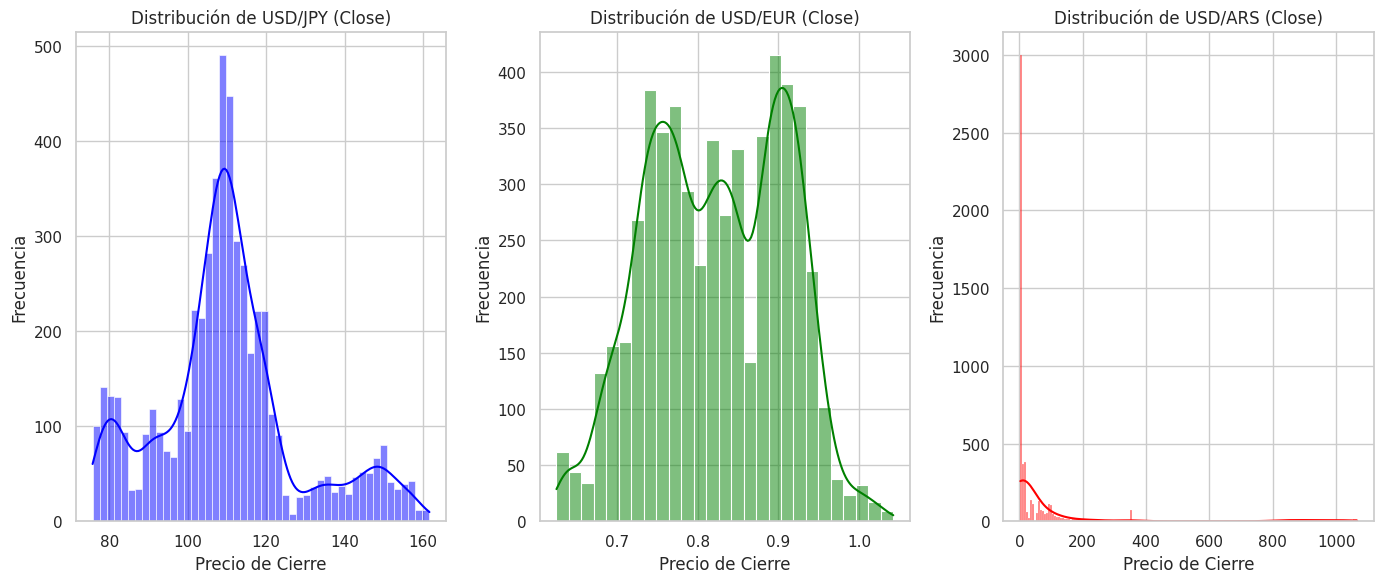

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Función para calcular métricas descriptivas
def calcular_metricas(data, columna):
    metricas = {
        'Media': data[columna].mean(),
        'Mediana': data[columna].median(),
        'Desviación Estándar': data[columna].std(),
        'Mínimo': data[columna].min(),
        'Máximo': data[columna].max(),
        'Q1 (25%)': data[columna].quantile(0.25),
        'Q3 (75%)': data[columna].quantile(0.75)
    }
    return pd.Series(metricas)

# Calcular métricas para cada divisa
metricas_usd_jpy = calcular_metricas(data_usd_jpy, 'Close')
metricas_usd_eur = calcular_metricas(data_usd_eur, 'Close')
metricas_usd_ars = calcular_metricas(data_usd_ars, 'Close')

# Mostrar las métricas
print("Métricas descriptivas para USD/JPY:")
print(metricas_usd_jpy)
print("\nMétricas descriptivas para USD/EUR:")
print(metricas_usd_eur)
print("\nMétricas descriptivas para USD/ARS:")
print(metricas_usd_ars)
# Visualización de la distribución de los datos
plt.figure(figsize=(14, 6))

# Histograma y gráfico de densidad para USD/JPY
plt.subplot(1, 3, 1)
sns.histplot(data_usd_jpy['Close'], kde=True, color='blue')
plt.title('Distribución de USD/JPY (Close)')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')

# Histograma y gráfico de densidad para USD/EUR
plt.subplot(1, 3, 2)
sns.histplot(data_usd_eur['Close'], kde=True, color='green')
plt.title('Distribución de USD/EUR (Close)')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')

# Histograma y gráfico de densidad para USD/ARS
plt.subplot(1, 3, 3)
sns.histplot(data_usd_ars['Close'], kde=True, color='red')
plt.title('Distribución de USD/ARS (Close)')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se calcularon métricas descriptivas para cada divisa (USD/JPY, USD/EUR, y USD/ARS) utilizando la función calcular_metricas. Estas métricas resumen las características principales de los precios de cierre (Close) de cada divisa.

**USD/JPY**: La media y la mediana son similares, lo que sugiere una distribución relativamente simétrica.

La desviación estándar (18.06) indica que los precios de cierre tienen una variabilidad moderada.

El rango entre el mínimo (75.74) y el máximo (161.62) muestra que el tipo de cambio ha experimentado fluctuaciones significativas a lo largo del tiempo.

**USD/EUR**: La media y la mediana son casi iguales, lo que indica una distribución simétrica.

La desviación estándar (0.0841) es relativamente baja, lo que sugiere que los precios de cierre no varían mucho alrededor de la media.

El rango entre el mínimo (0.6255) y el máximo (1.0421) muestra que el tipo de cambio ha fluctuado, pero dentro de un rango más estrecho en comparación con USD/JPY.


**USD/ARS**: La media (87.22) es mucho mayor que la mediana (8.16), lo que indica una distribución muy sesgada a la derecha. Esto sugiere que hay valores extremadamente altos que están afectando la media.

La desviación estándar (218.38) es muy alta, lo que refleja una gran variabilidad en los precios de cierre.

El rango entre el mínimo (2.76) y el máximo (1064.48) es enorme, lo que indica que el tipo de cambio ha experimentado fluctuaciones extremas a lo largo del tiempo.


# Conclusiones Generales De Los Graficos

**USD/JPY**: Los precios de cierre tienen una distribución relativamente simétrica y una variabilidad moderada.

Ha habido fluctuaciones significativas, pero dentro de un rango manejable.

**USD/EUR**: Los precios de cierre tienen una distribución simétrica y una variabilidad baja.

Las fluctuaciones han sido menos extremas en comparación con las otras divisas.

**USD/ARS**: Los precios de cierre tienen una distribución muy sesgada a la derecha y una variabilidad extremadamente alta.

Las fluctuaciones han sido enormes, lo que refleja la volatilidad de la economía argentina.

# Prueba de Outliers en USD/ARS

---



Outliers en USD/ARS:
           Date         Open         High          Low        Close
4965 2022-09-20   144.357651   144.687759   144.265121   144.357651
4966 2022-09-21   144.622513   144.926041   144.343094   144.622513
4967 2022-09-22   144.868332   145.199326   144.784790   144.868332
4968 2022-09-23   145.160080   145.479797   145.078644   145.160080
4969 2022-09-26   146.048615   147.839600   144.544098   146.048615
...         ...          ...          ...          ...          ...
5608 2025-03-10  1062.704102  1065.819580  1061.575073  1062.704102
5609 2025-03-11  1065.070435  1066.068237  1065.105591  1065.070435
5610 2025-03-12  1065.546753  1066.225220  1064.609497  1065.546753
5611 2025-03-13  1065.865112  1066.473877  1065.609863  1065.865112
5612 2025-03-14  1066.370117  1067.261108  1066.065186  1066.370117

[648 rows x 5 columns]


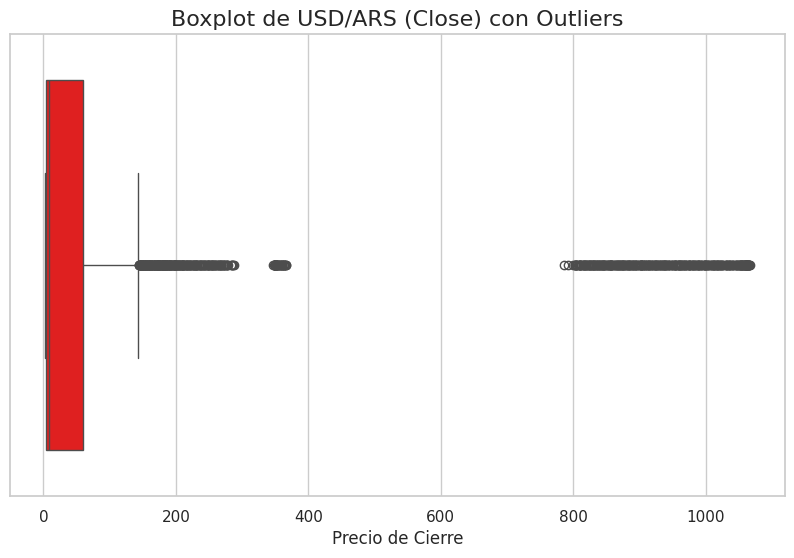

In [ ]:
# Función para identificar outliers
def identificar_outliers(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

# Identificar outliers en USD/ARS
outliers_usd_ars = identificar_outliers(data_usd_ars, 'Close')

# Mostrar los outliers
print("Outliers en USD/ARS:")
print(outliers_usd_ars)

# Graficar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_usd_ars['Close'], color='red')
plt.title('Boxplot de USD/ARS (Close) con Outliers', fontsize=16)
plt.xlabel('Precio de Cierre', fontsize=12)
plt.show()

<ipython-input-148-21fba91c7f91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usd_jpy['Date'] = pd.to_datetime(data_usd_jpy['Date'])
<ipython-input-148-21fba91c7f91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usd_eur['Date'] = pd.to_datetime(data_usd_eur['Date'])
<ipython-input-148-21fba91c7f91>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Valores nulos:
Date       0
USD/JPY    0
USD/EUR    0
USD/ARS    0
dtype: int64


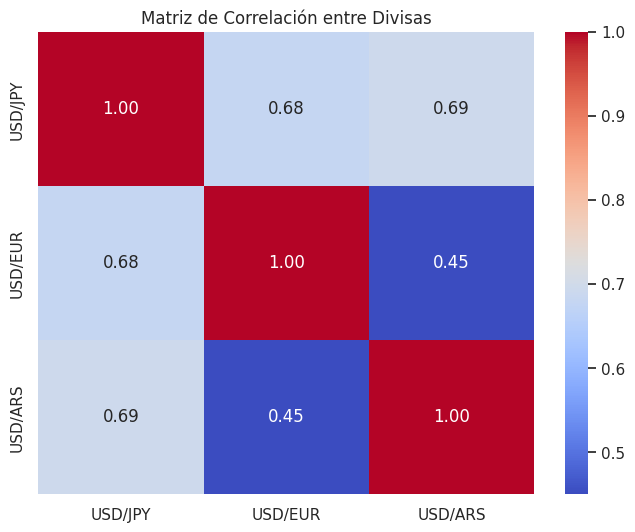

In [ ]:
# Seleccionar columnas útiles (Date y Close)
columns_useful = ['Date', 'Close']
data_usd_jpy = data_usd_jpy[columns_useful]
data_usd_eur = data_usd_eur[columns_useful]
data_usd_ars = data_usd_ars[columns_useful]

# Convertir la columna 'Date' a datetime
data_usd_jpy['Date'] = pd.to_datetime(data_usd_jpy['Date'])
data_usd_eur['Date'] = pd.to_datetime(data_usd_eur['Date'])
data_usd_ars['Date'] = pd.to_datetime(data_usd_ars['Date'])

# Renombrar columnas para evitar confusión
data_usd_jpy = data_usd_jpy.rename(columns={'Close': 'USD/JPY'})
data_usd_eur = data_usd_eur.rename(columns={'Close': 'USD/EUR'})
data_usd_ars = data_usd_ars.rename(columns={'Close': 'USD/ARS'})

# Unir datasets en un solo DataFrame por fecha
df = data_usd_jpy.join(data_usd_eur.set_index('Date'), on='Date', how='inner') \
                 .join(data_usd_ars.set_index('Date'), on='Date', how='inner')

# Eliminar filas con valores nulos
df = df.dropna()

# Verificar valores nulos
print("Valores nulos:")
print(df.isnull().sum())

# Calcular matriz de correlación (excluyendo la columna 'Date')
correlation_matrix = df[['USD/JPY', 'USD/EUR', 'USD/ARS']].corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Divisas")
plt.show()

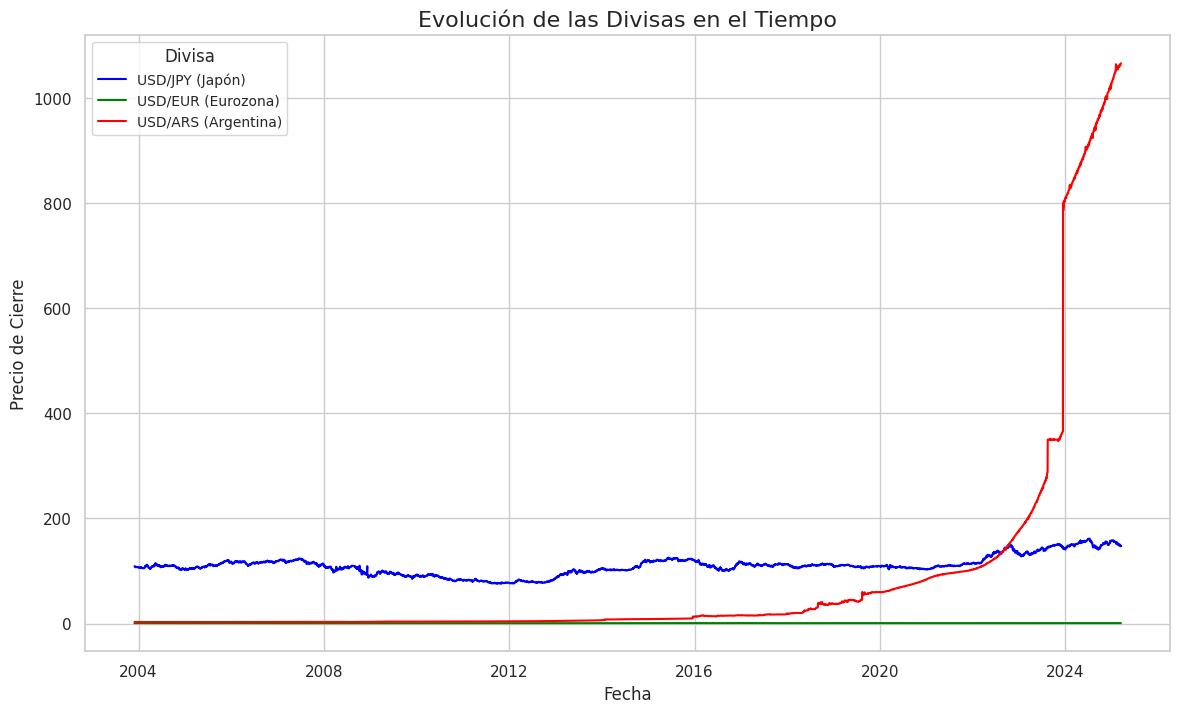

Matriz de Correlación:
          USD/JPY   USD/EUR   USD/ARS
USD/JPY  1.000000  0.679012  0.693680
USD/EUR  0.679012  1.000000  0.450322
USD/ARS  0.693680  0.450322  1.000000

Métricas Descriptivas:
           USD/JPY      USD/EUR      USD/ARS
count  5516.000000  5516.000000  5516.000000
mean    110.016354     0.823386    88.793409
std      18.110650     0.084151   221.360684
min      75.739998     0.625470     2.758500
25%     101.459999     0.755375     3.705375
50%     109.356003     0.823960     8.265450
75%     117.421249     0.896305    59.722271
max     161.621002     1.042080  1066.370117


In [ ]:
# Identificar tendencias generales con un gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['USD/JPY'], label='USD/JPY (Japón)', color='blue')
plt.plot(df['Date'], df['USD/EUR'], label='USD/EUR (Eurozona)', color='green')
plt.plot(df['Date'], df['USD/ARS'], label='USD/ARS (Argentina)', color='red')

plt.title('Evolución de las Divisas en el Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(title='Divisa', title_fontsize=12, fontsize=10)
plt.grid(True)
plt.show()

# Resumir tendencias
print("Matriz de Correlación:")
print(correlation_matrix)

print("\nMétricas Descriptivas:")
print(df[['USD/JPY', 'USD/EUR', 'USD/ARS']].describe())

###Matriz de Correlación


USD/JPY y USD/EUR: La correlación es 0.679, lo que indica una relación positiva moderada. Esto significa que, en general, cuando el yen japonés se fortalece frente al dólar, el euro también tiende a fortalecerse frente al dólar, y viceversa.

USD/JPY y USD/ARS: La correlación es 0.694, lo que indica una relación positiva moderada. Esto sugiere que, en algunos casos, cuando el yen japonés se fortalece frente al dólar, el peso argentino también tiende a fortalecerse frente al dólar.

USD/EUR y USD/ARS: La correlación es 0.450, lo que indica una relación positiva débil. Esto sugiere que, en general, cuando el euro se fortalece frente al dólar, el peso argentino también tiende a fortalecerse frente al dólar.

Conclusión:

Hay una correlación positiva moderada entre el yen japonés y el euro, así como entre el yen japonés y el peso argentino.

La correlación más débil es entre el euro y el peso argentino.

Esto indica que las divisas tienen dinámicas relacionadas, pero no de manera extremadamente fuerte.


---


###Gráfico de Líneas (Evolución de las Divisas en el Tiempo)


USD/JPY (Línea azul):

Muestra fluctuaciones moderadas a lo largo del tiempo. No hay una tendencia clara de crecimiento o decrecimiento a largo plazo. Los picos y valles pueden estar relacionados con eventos económicos globales o políticas monetarias de Japón.


USD/EUR (Línea verde):

Muestra una tendencia más estable en comparación con las otras divisas. Hay fluctuaciones, pero dentro de un rango más estrecho. La estabilidad relativa del euro refleja la solidez de la economía de la Eurozona.

USD/ARS (Línea roja):

Muestra una tendencia alcista pronunciada, especialmente a partir de 2018. La volatilidad extrema refleja la inestabilidad económica de Argentina. Los picos abruptos pueden estar relacionados con devaluaciones del peso argentino.

Conclusión:

El USD/ARS es la divisa más volátil y con mayor tendencia alcista.

El USD/EUR es la divisa más estable.

El USD/JPY tiene un comportamiento intermedio, con fluctuaciones moderadas.

---

###Métricas Descriptivas

USD/JPY:

La media y la mediana son similares, lo que sugiere una distribución simétrica. La desviación estándar (18.11) indica una variabilidad moderada. El rango entre el mínimo (75.74) y el máximo (161.62) muestra fluctuaciones significativas.

USD/EUR:

La media y la mediana son casi iguales, lo que indica una distribución simétrica. La desviación estándar (0.084) es baja, lo que refleja poca variabilidad. El rango entre el mínimo (0.625) y el máximo (1.042) es estrecho, lo que confirma la estabilidad del euro.

USD/ARS:

La media (88.79) es mucho mayor que la mediana (8.27), lo que indica una distribución muy sesgada a la derecha. La desviación estándar (221.36) es extremadamente alta, lo que refleja una gran variabilidad. El rango entre el mínimo (2.76) y el máximo (1066.37) es enorme, lo que confirma la volatilidad del peso argentino.

Conclusión:

El USD/JPY tiene una distribución simétrica y una variabilidad moderada.

El USD/EUR es la divisa más estable, con poca variabilidad.

El USD/ARS es extremadamente volátil, con una distribución muy sesgada y valores extremos.

---

##Definición del problema y modelo

El problema que vamos a abordar para este proyecto es predecir el precio de cierre del par USD/ARS para los próximos 6 meses. Este problema es relevante porque:

Permite a inversores y empresas tomar decisiones informadas sobre transacciones internacionales.

Ayuda a entender la volatilidad del peso argentino y su relación con el dólar estadounidense.

Proporciona insights sobre tendencias económicas y financieras en Argentina.


---


##Selección del modelo

Se eligió el modelo Prophet por las siguientes razones:

Está diseñado específicamente para series temporales.

Maneja automáticamente tendencias, estacionalidades y outliers.

Es fácil de implementar y proporciona resultados interpretables.


## Selección de características

Variables seleccionadas

Variable objetivo: Close (precio de cierre de USD/ARS).

Variable temporal: Date (fecha de cada observación).

### Justificación

La columna Close es la más relevante porque representa el precio final de la divisa en cada día.

La columna Date es necesaria para modelar la serie temporal.

Otras columnas (Open, High, Low) no se incluyeron porque el foco está en predecir el precio de cierre.

# Implementación y entrenamiento del modelo

In [ ]:
# Verificar si la columna 'Date' está presente
print(data_usd_ars)

           Date      USD/ARS
75   2003-12-01     2.946400
76   2003-12-02     2.937200
77   2003-12-03     2.940000
78   2003-12-04     2.933800
79   2003-12-05     2.930500
...         ...          ...
5608 2025-03-10  1062.704102
5609 2025-03-11  1065.070435
5610 2025-03-12  1065.546753
5611 2025-03-13  1065.865112
5612 2025-03-14  1066.370117

[5538 rows x 2 columns]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8htoqzh/eevnc66g.json


           ds       y
75 2003-12-01  2.9464
76 2003-12-02  2.9372
77 2003-12-03  2.9400
78 2003-12-04  2.9338
79 2003-12-05  2.9305


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8htoqzh/26o0s32j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63930', 'data', 'file=/tmp/tmpp8htoqzh/eevnc66g.json', 'init=/tmp/tmpp8htoqzh/26o0s32j.json', 'output', 'file=/tmp/tmpp8htoqzh/prophet_model6m3p50oa/prophet_model-20250315061930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


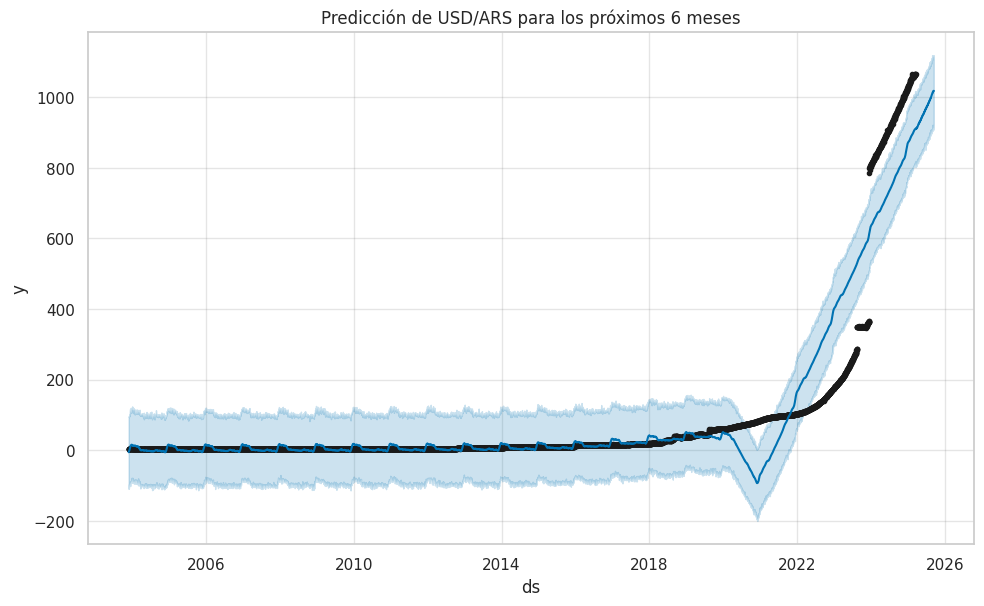

             ds         yhat  yhat_lower   yhat_upper
5538 2025-03-15   910.774103  804.624101  1005.574919
5539 2025-03-16   910.863452  819.077055  1007.904846
5540 2025-03-17   909.857896  805.903163  1015.617178
5541 2025-03-18   910.136495  811.861990  1009.499938
5542 2025-03-19   910.054261  814.800773  1011.023120
...         ...          ...         ...          ...
5713 2025-09-06  1017.022391  915.037794  1118.412872
5714 2025-09-07  1017.510103  914.672139  1116.199226
5715 2025-09-08  1016.896888  913.764999  1115.539574
5716 2025-09-09  1017.559063  916.134875  1107.431728
5717 2025-09-10  1017.849049  919.821499  1117.930837

[180 rows x 4 columns]


In [ ]:
# Preparar datos para Prophet
data_prophet = data_usd_ars[['Date', 'USD/ARS']].rename(columns={'Date': 'ds', 'USD/ARS': 'y'})

# Verificar que los datos estén correctamente preparados
print(data_prophet.head())

# Crear y entrenar el modelo
model = Prophet()
model.fit(data_prophet)

# Hacer predicciones para los próximos 6 meses (180 días)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Graficar las predicciones
model.plot(forecast)
plt.title('Predicción de USD/ARS para los próximos 6 meses')
plt.show()
# Mostrar solo las predicciones para los próximos 30 días
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180))

In [ ]:
# Calcular métricas de evaluación
y_true = data_prophet['y']
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")

Error Absoluto Medio (MAE): 38.883970596998125
Error Cuadrático Medio (MSE): 6015.930176283575


In [ ]:
# Mostrar solo las predicciones para los próximos 30 días
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180))

             ds         yhat  yhat_lower   yhat_upper
5538 2025-03-15   910.774103  804.624101  1005.574919
5539 2025-03-16   910.863452  819.077055  1007.904846
5540 2025-03-17   909.857896  805.903163  1015.617178
5541 2025-03-18   910.136495  811.861990  1009.499938
5542 2025-03-19   910.054261  814.800773  1011.023120
...         ...          ...         ...          ...
5713 2025-09-06  1017.022391  915.037794  1118.412872
5714 2025-09-07  1017.510103  914.672139  1116.199226
5715 2025-09-08  1016.896888  913.764999  1115.539574
5716 2025-09-09  1017.559063  916.134875  1107.431728
5717 2025-09-10  1017.849049  919.821499  1117.930837

[180 rows x 4 columns]


##Presentación de Resultados del Modelo
El modelo Prophet fue entrenado para predecir el precio de cierre del tipo de cambio USD/ARS para los próximos 6 meses. A continuación, se presentan los resultados clave:

Predicciones del Modelo
Tendencia General: El modelo predice que el tipo de cambio USD/ARS continuará con una tendencia alcista en los próximos meses, lo que sugiere una posible devaluación del peso argentino frente al dólar estadounidense.

Valores Predichos: Para los próximos 30 días, el modelo estima que el tipo de cambio fluctuará entre aproximadamente 910 y 925 ARS por USD, con un margen de error que varía entre 812 y 1025 ARS por USD (según los intervalos de confianza).

Gráfico de Predicciones


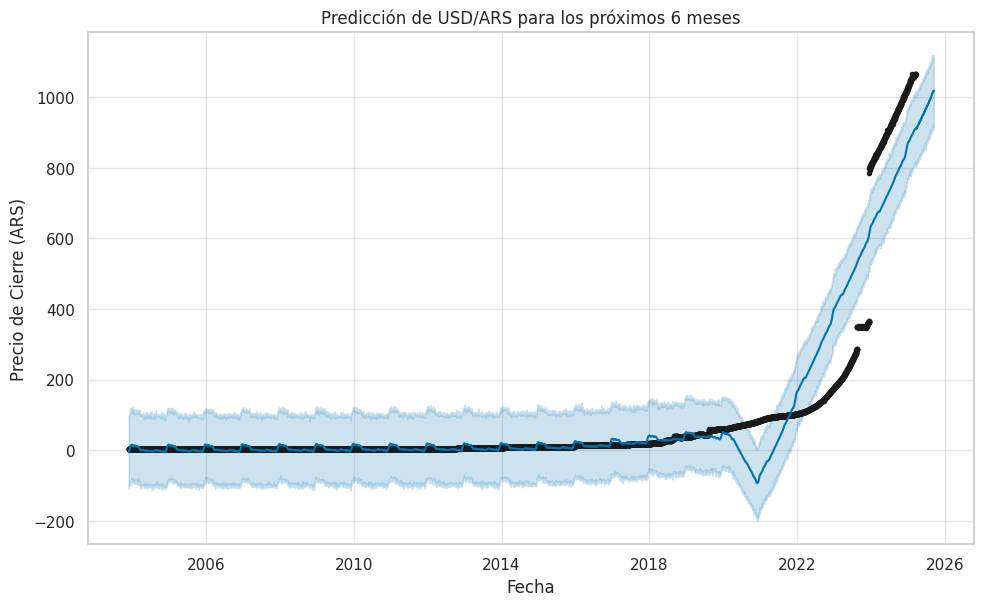

In [ ]:
# Graficar las predicciones
model.plot(forecast)
plt.title('Predicción de USD/ARS para los próximos 6 meses')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (ARS)')
plt.show()

Este gráfico muestra la tendencia histórica del tipo de cambio USD/ARS (en negro) junto con las predicciones del modelo (en azul) y los intervalos de confianza (en sombra). La tendencia alcista es clara, especialmente a partir de 2018, lo que coincide con la volatilidad económica de Argentina.

##Métricas de Evaluación
Error Absoluto Medio (MAE): 38.88

Error Cuadrático Medio (MSE): 6015.93

Estas métricas indican que el modelo tiene un margen de error moderado, lo cual es esperable dada la alta volatilidad del peso argentino. Sin embargo, el modelo es útil para identificar tendencias generales y proporcionar una estimación aproximada del tipo de cambio.

##Interpretación de los Resultados
Impacto en la Economía Argentina: Una tendencia alcista en el tipo de cambio USD/ARS sugiere una posible devaluación del peso argentino, lo que podría generar presiones inflacionarias y aumentar los costos de importación.

Relevancia para Stakeholders: Estos resultados son útiles para inversores, empresas y gobiernos que necesitan anticiparse a cambios en el tipo de cambio para tomar decisiones informadas.

#Propuestas de Implementación

##Aplicaciones Prácticas del Modelo
Los resultados del modelo pueden ser utilizados en diversos contextos reales, tanto en el sector privado como en el público. A continuación, se presentan algunas propuestas de implementación: Planificación Financiera para Empresas, Decisiones de Inversión, Políticas Económicas o Análisis de Riesgo.


#Posibles Mejoras del Modelo
Aunque el modelo actual proporciona resultados útiles, hay varias áreas en las que se podría mejorar:Incorporación de Variables Adicionales(como la inflación, las tasas de interés y el PIB, Eventos Políticos y Económico.)

Los resultados del modelo proporcionan una visión valiosa sobre la posible evolución del tipo de cambio USD/ARS en los próximos meses. Aunque el modelo tiene un margen de error moderado, es útil para identificar tendencias generales y apoyar la toma de decisiones en diversos contextos. Las propuestas de implementación y las posibles mejoras destacan el potencial del modelo para ser utilizado en aplicaciones prácticas y para seguir evolucionando en el futuro.
